### Treść zadania

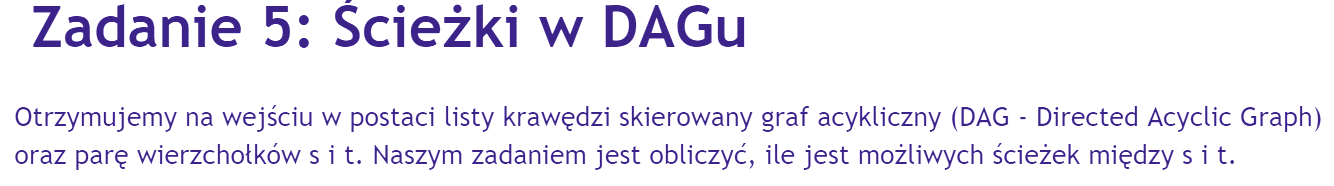

### Omówienie algorytmu

Liczba ścieżek do danego wierzchołka $ u $ jest równa sumie liczb wszystkich ścieżek do wszystkich jego rodziców (za rodzica uznajemy ten wierzchołek, z którego możemy wejść do wierzchołka $ u $, a za dzieci wierzchołka $ u $ takie wierzchołki $ v $, do których możemy wyjść z $ u $).

### Złożoność

Dla obu implementacji taka sama.
###### Obliczeniowa:
$ O(V + E) $
###### Pamięciowa:
$ O(V) $

### Implementacja #1
##### DFS i sumowanie rekurencyjne obliczanych od końca (od t do s) wartości

In [1]:
def count_all_paths(G, s, t):
    n = len(G)
    visited = [False] * n
    counts = [0] * n
    counts[t] = 1

    def dfs(u):
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                dfs(v)
            counts[u] += counts[v]
            
    dfs(s)
        
    return counts[s]


def dag_list(E: 'array of graph edges'):
    n = max(u for edge in E for u in edge) + 1
    G = [[] for _ in range(n)]
    for u, v in E:
        G[u].append(v)
    return G

###### Kilka testów

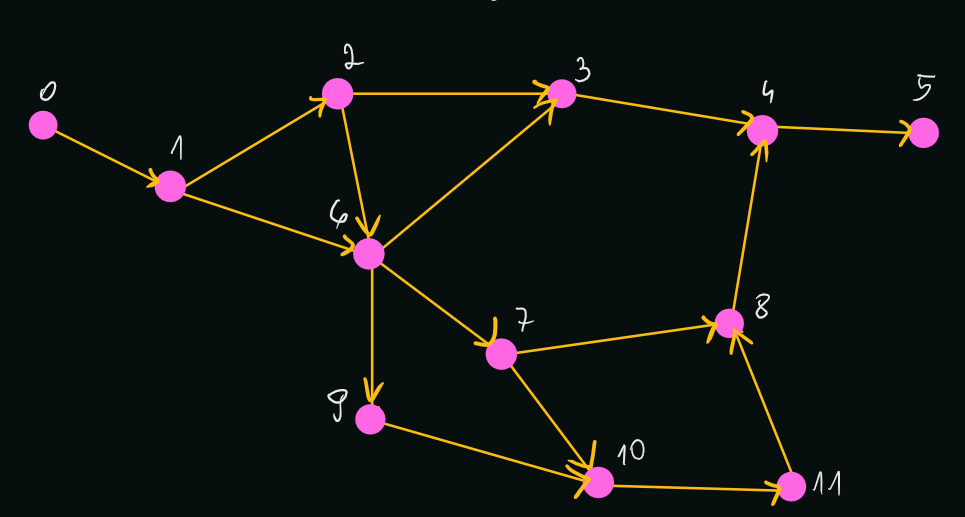

In [2]:
E = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (2, 6), (1, 6), (6, 3), (6, 9), (9, 10), (6, 7), (7, 10),
     (7, 8), (10, 11), (11, 8), (8, 4)]

G = dag_list(E)
print(count_all_paths(G, 0, 5))
print(count_all_paths(G, 0, 3))

9
3


### (Dodatkowo) Zwracanie wszystkich ścieżek
##### (Odtwarzanie ścieżek da się zrobić lepiej niż poprzez kopiowanie całych tablic, jak ma to miejsce niżej)

Lepsza implementacja (bez tworzenia kopii tablicy, w której umieszczamy kolejne wierzchołki ze ścieżek, przy każdym dodaniu wierzchołka), znajduje się: <a href="#better-paths">TUTAJ</a>.

In [3]:
from queue import Queue


def restore_paths(parents, s, t):
    n = len(parents)
    result = []

    def recur(u, curr=[]):
        if u == s:
            result.append([u] + curr)
        else:
            for v in parents[u]:
                recur(v, [u] + curr)

    recur(t)

    return result


def get_all_paths(G, s, t):
    n = len(G)
    q = Queue()
    q.put(s)
    parents = [[] for _ in range(n)]

    while not q.empty():
        i = q.get()
        for j in G[i]:
            if not parents[j]:
                q.put(j)
            parents[j].append(i)

    return restore_paths(parents, s, t)

###### Kilka testów

In [4]:
def paths(G, s, t):
    print(f'All paths from {s} to {t}')
    print(*(f'{i+1:<3} {path}' for i, path in enumerate(map(lambda arr: ' -> '.join(map(str, arr)), get_all_paths(G, s, t)))),sep ='\n')

In [5]:
E = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (2, 6), (1, 6), (6, 3), (6, 9), (9, 10), (6, 7), (7, 10),
     (7, 8), (10, 11), (11, 8), (8, 4)]

G = dag_list(E)

paths(G, 0, 5)

All paths from 0 to 5
1   0 -> 1 -> 2 -> 3 -> 4 -> 5
2   0 -> 1 -> 6 -> 3 -> 4 -> 5
3   0 -> 1 -> 2 -> 6 -> 3 -> 4 -> 5
4   0 -> 1 -> 6 -> 7 -> 8 -> 4 -> 5
5   0 -> 1 -> 2 -> 6 -> 7 -> 8 -> 4 -> 5
6   0 -> 1 -> 6 -> 9 -> 10 -> 11 -> 8 -> 4 -> 5
7   0 -> 1 -> 2 -> 6 -> 9 -> 10 -> 11 -> 8 -> 4 -> 5
8   0 -> 1 -> 6 -> 7 -> 10 -> 11 -> 8 -> 4 -> 5
9   0 -> 1 -> 2 -> 6 -> 7 -> 10 -> 11 -> 8 -> 4 -> 5


In [6]:
paths(G, 0, 3)

All paths from 0 to 3
1   0 -> 1 -> 2 -> 3
2   0 -> 1 -> 6 -> 3
3   0 -> 1 -> 2 -> 6 -> 3


In [7]:
paths(G, 0, 11)

All paths from 0 to 11
1   0 -> 1 -> 6 -> 9 -> 10 -> 11
2   0 -> 1 -> 2 -> 6 -> 9 -> 10 -> 11
3   0 -> 1 -> 6 -> 7 -> 10 -> 11
4   0 -> 1 -> 2 -> 6 -> 7 -> 10 -> 11


In [8]:
paths(G, 6, 8)

All paths from 6 to 8
1   6 -> 7 -> 8
2   6 -> 9 -> 10 -> 11 -> 8
3   6 -> 7 -> 10 -> 11 -> 8


### Implementacja #2
##### (Algorytm, który wykorzystuje prostą rekurencję i podejście bardziej przypominające programowanie dynamiczne)

Nie musimy wykorzystywać algorytmu DFS ani zapisywać odwiedzonych wierzchołków. Wystarczy wykorzystać rekurencję ze spamiętywaniem.

##### Kod:

In [9]:
def count_all_paths(G, s, t):
    n = len(G)
    counts = [0] * n
    counts[t] = 1

    def recur(u):
        if not counts[u]:
            for v in G[u]:
                counts[u] += recur(v)
        return counts[u]
        
    return recur(s)


def dag_list(E: 'array of graph edges'):
    n = max(u for edge in E for u in edge) + 1
    G = [[] for _ in range(n)]
    for u, v in E:
        G[u].append(v)
    return G

###### Kilka testów

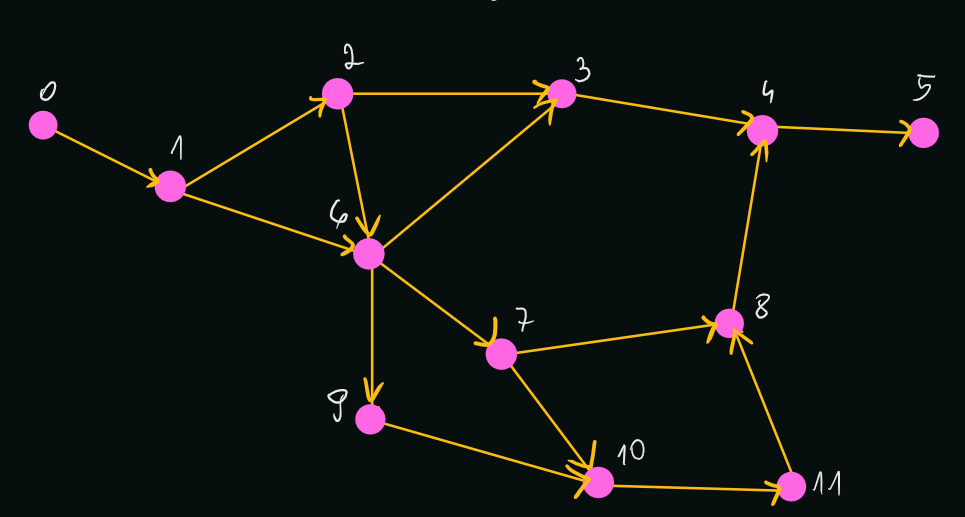

In [10]:
E = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (2, 6), (1, 6), (6, 3), (6, 9), (9, 10), (6, 7), (7, 10),
     (7, 8), (10, 11), (11, 8), (8, 4)]

G = dag_list(E)
print(count_all_paths(G, 0, 5))
print(count_all_paths(G, 0, 3))

9
3


### (Dodatkowo) Zwracanie wszystkich ścieżek <span id="better-paths"></span>

In [11]:
def get_all_paths(G, s, t):
    n = len(G)
    counts = [0] * n
    counts[t] = 1
    children = [[] for _ in range(n)]

    def recur(u):
        if not counts[u]:
            for v in G[u]:
                counts[u] += recur(v)
                children[u].append(v)
        return counts[u]
        
    return recur(s), restore_paths(children, s, t)


def restore_paths(children, s, t):
    res = []
    path = []
    
    def recur(u):
        path.append(u)
        if u == t: 
            res.append(path[:])
            path.pop()
            return
        for v in children[u]:
            recur(v)
        path.pop()
        
    recur(s)
    return res
        

def dag_list(E: 'array of graph edges'):
    n = max(u for edge in E for u in edge) + 1
    G = [[] for _ in range(n)]
    for u, v in E:
        G[u].append(v)
    return G

###### Kilka testów

In [12]:
def paths(G, s, t):
    print(f'All paths from {s} to {t}')
    count, P = get_all_paths(G, s, t)
    print('Number of paths:', count)
    print(*(f'{i+1:<3} {path}' for i, path in enumerate(map(lambda arr: ' -> '.join(map(str, arr)), P))),sep ='\n')

In [13]:
E = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (2, 6), (1, 6), (6, 3), (6, 9), (9, 10), (6, 7), (7, 10),
     (7, 8), (10, 11), (11, 8), (8, 4)]

G = dag_list(E)

paths(G, 0, 5)

All paths from 0 to 5
Number of paths: 9
1   0 -> 1 -> 2 -> 3 -> 4 -> 5
2   0 -> 1 -> 2 -> 6 -> 3 -> 4 -> 5
3   0 -> 1 -> 2 -> 6 -> 9 -> 10 -> 11 -> 8 -> 4 -> 5
4   0 -> 1 -> 2 -> 6 -> 7 -> 10 -> 11 -> 8 -> 4 -> 5
5   0 -> 1 -> 2 -> 6 -> 7 -> 8 -> 4 -> 5
6   0 -> 1 -> 6 -> 3 -> 4 -> 5
7   0 -> 1 -> 6 -> 9 -> 10 -> 11 -> 8 -> 4 -> 5
8   0 -> 1 -> 6 -> 7 -> 10 -> 11 -> 8 -> 4 -> 5
9   0 -> 1 -> 6 -> 7 -> 8 -> 4 -> 5


In [14]:
paths(G, 0, 3)

All paths from 0 to 3
Number of paths: 3
1   0 -> 1 -> 2 -> 3
2   0 -> 1 -> 2 -> 6 -> 3
3   0 -> 1 -> 6 -> 3


In [15]:
paths(G, 0, 11)

All paths from 0 to 11
Number of paths: 4
1   0 -> 1 -> 2 -> 6 -> 9 -> 10 -> 11
2   0 -> 1 -> 2 -> 6 -> 7 -> 10 -> 11
3   0 -> 1 -> 6 -> 9 -> 10 -> 11
4   0 -> 1 -> 6 -> 7 -> 10 -> 11


In [16]:
paths(G, 6, 8)

All paths from 6 to 8
Number of paths: 3
1   6 -> 9 -> 10 -> 11 -> 8
2   6 -> 7 -> 10 -> 11 -> 8
3   6 -> 7 -> 8
